Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 4
-----------------

# Linear Classification using Tensorflow on CIFAR-10 Dataset

### Objectives:
1. Study the linear classification with TensorFlow.
2. Implement the linear classification model on the CIFAR-10 dataset.

### Theory:
Linear classification is a simple algorithm where each input feature is given a weight and the output is a linear combination of these features, followed by an activation function to determine class labels. In the context of CIFAR-10, a linear classifier attempts to distinguish between 10 different image classes by learning weights and biases for each pixel's contribution to a particular class.

CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. It is a well-known dataset for image classification tasks. Since a linear classifier is not very complex, its performance on this dataset will be limited, but it is a good starting point to understand the basics.

### Code:

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizing the data (0-255 to 0-1) to make it easier for the model to learn
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 68s 0us/step


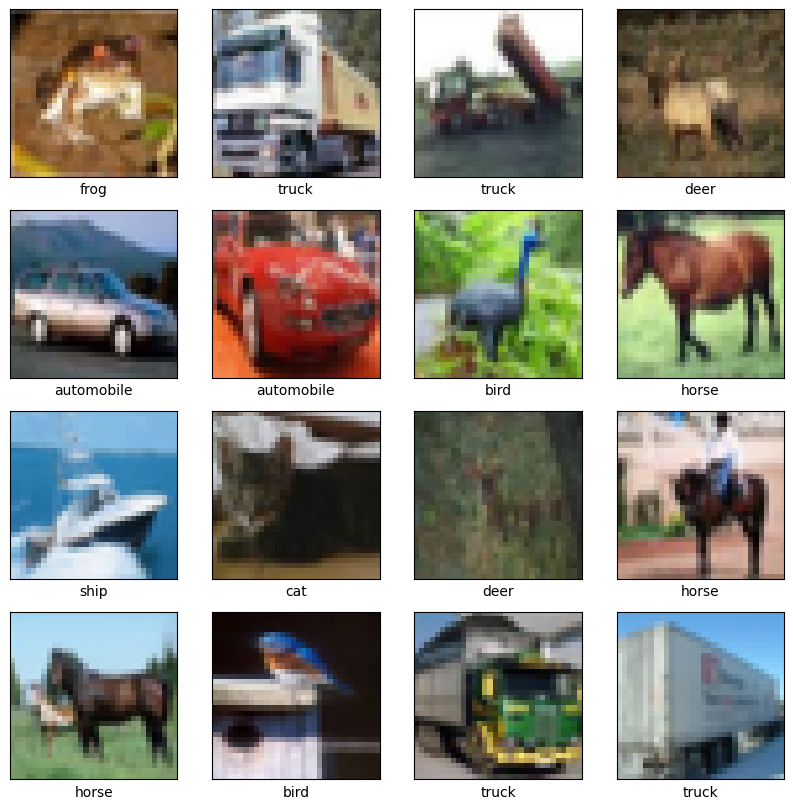

In [3]:
# Visualizing some of the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(x, y, class_names):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i][0]])
    plt.show()

plot_sample_images(x_train, y_train, class_names)

In [4]:
# Linear classification model
# Flattening the input data (32x32x3) into 1D vector (3072 dimensions)
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the image
    layers.Dense(10, activation='softmax')    # Output layer with 10 classes
])

# Compiling the model with loss, optimizer, and metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9535 - accuracy: 0.3192 - val_loss: 1.8560 - val_accuracy: 0.3536
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8810 - accuracy: 0.3523 - val_loss: 1.8014 - val_accuracy: 0.3601
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8525 - accuracy: 0.3610 - val_loss: 1.8491 - val_accuracy: 0.3624
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8405 - accuracy: 0.3684 - val_loss: 1.8253 - val_accuracy: 0.3695
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8247 - accuracy: 0.3770 - val_loss: 1.8539 - val_accuracy: 0.3570
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8219 - accuracy: 0.3768 - val_loss: 1.8620 - val_accuracy: 0.3521
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8244 - accuracy: 0.3792 - val_loss: 1.7566 - val_accuracy:

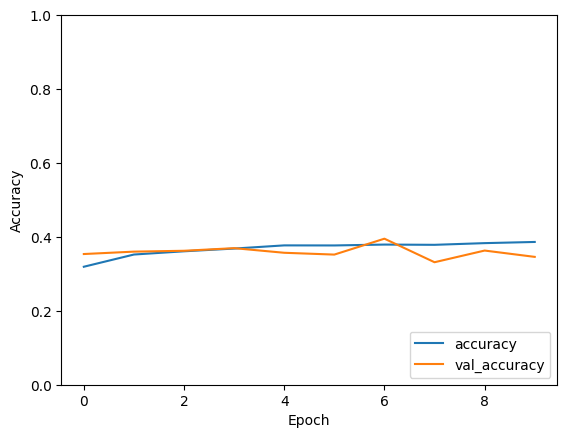

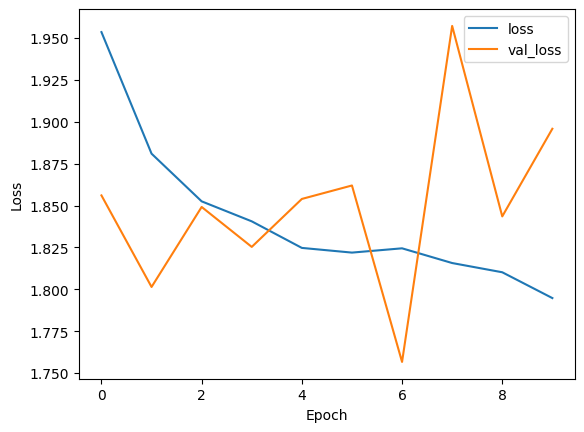

In [5]:
# Plotting accuracy and loss over epochs
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

plot_history(history)

In [6]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 1s - loss: 1.8958 - accuracy: 0.3459 - 533ms/epoch - 2ms/step

Test accuracy: 0.3458999991416931


### Conclusion:
In this notebook, we explored linear classification using TensorFlow on the CIFAR-10 dataset. While linear classifiers are quite simple and lack the complexity to model intricate patterns in image data, this experiment gives us a good understanding of the basic mechanics of classification tasks. The achieved test accuracy on the CIFAR-10 dataset is only 34.58% which demonstrates that more advanced models like CNNs are typically required for higher performance in image recognition tasks.